In [68]:
import pandas as pd
import numpy as np


df = pd.read_excel(r"C:\Users\Maximilian.Rasch\Desktop\Projekt 2\MS Bestelleinheiten.xlsx", sheet_name="Data")


#df = pd.read_excel(r"C:\Users\Maximilian.Rasch\Desktop\Projekt 2\Palmberger Bestelleinheiten.xlsx", sheet_name="Data")

df2 = df[["Artikel", "Artikelgruppe"]]

print(df2.head(5))

                              Artikel           Artikelgruppe
0  Alpen Maultaschen gerollt 4 x 100g  Fertigprodukte in Kilo
1  Alpenmaultaschen gerollt 30 x 100g             Maultaschen
2  Alpenmaultaschen gerollt 30 x 100g             Maultaschen
3  Alpenmaultaschen gerollt 30 x 100g             Maultaschen
4          Apfel Griebenschmalz 150g       Fett Spezialitäten


In [72]:
def condition2(x, labels):
    controll = {}
    labels = labels
    controll[(labels[0])] = 1
    for i in range(1, len(labels)+1):
        for e in labels:
            if e not in controll:
                controll.update({e: list(controll.values())[-1]+1})
    return controll[x]

l = l =(df2["Artikelgruppe"].unique()).tolist()

df2["Labels as num"] = df2["Artikelgruppe"].apply(condition2,labels=l)

print(df2.head(5))

                              Artikel           Artikelgruppe  Labels as num
0  Alpen Maultaschen gerollt 4 x 100g  Fertigprodukte in Kilo              1
1  Alpenmaultaschen gerollt 30 x 100g             Maultaschen              2
2  Alpenmaultaschen gerollt 30 x 100g             Maultaschen              2
3  Alpenmaultaschen gerollt 30 x 100g             Maultaschen              2
4          Apfel Griebenschmalz 150g       Fett Spezialitäten              3


<ipython-input-72-cc599ee297e6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Labels as num"] = df2["Artikelgruppe"].apply(condition2,labels=l)


In [75]:
import re
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')


customstomwords = []


def stopwordpress(word):
    splitted = word.split(" ")
    clear = []
    for e in splitted:
        if(re.search(r'[0-9]+', e)):
            clear.append(e)
        elif len(e) == 1:
            clear.append(e)
        elif(re.match('^Aroma', e)):
            clear.append(e)
        elif(re.match('^gegart', e)):
            clear.append(e)
        elif(re.match('^grob', e)):
            clear.append(e)
        elif(re.match('^klein', e)):
            clear.append(e)
        elif(re.match('^befüllt', e)):
            clear.append(e)
        elif(re.match('^geschnitten', e)):
            clear.append(e)
        elif(re.match('^gegart', e)):
            clear.append(e)
        elif(re.match('^fein', e)):
            clear.append(e)           
        elif e == "":
            pass
    return clear

for e in df2["Artikel"]:
    customstomwords.append(stopwordpress(e))

stopwordsfinal = [item for sublist in customstomwords for item in sublist]

for e in german_stop_words:
    stopwordsfinal.append(e)


In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(stop_words=stopwordsfinal)
x_train_count = v.fit_transform(df2["Artikel"])


x_train, x_test, y_train, y_test = train_test_split(x_train_count, df2["Labels as num"], train_size=0.7, test_size=0.3, random_state=42)

model = MultinomialNB(alpha=0.2)
model.fit(x_train_count, df2["Labels as num"])

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test[0:10],y_pred[0:10])
cm


0.851138353765324
0.8414634146341463


C:\Users\Maximilian.Rasch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00', '05kg', '105g', '17', '19', '25kg', '34', '35', '43', '4lbs', '5cm', '7kg', '8kg', '9kg', 'aromabox', 'aromapack', 'aromapackung', 'aromasch', 'aromaschale', 'aromaschlauch', 'aromaschutz', 'bierschinken160g', 'ca', 'i1', 'lose', 'paar', 'sb', 'scheibe'] not in stop_words.
  warnings.warn(


array([[1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

Text(42.0, 0.5, 'Truth')

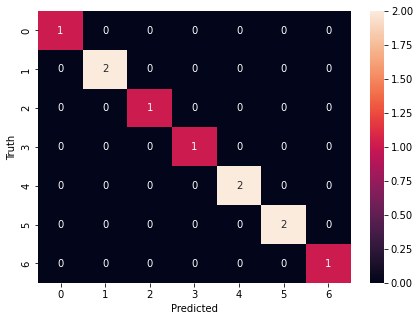

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      1.00      0.70        16
           2       0.80      0.62      0.70        13
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       1.00      0.92      0.96        13
           6       1.00      0.92      0.96        13
           8       0.86      1.00      0.92        12
           9       1.00      0.50      0.67         2
          10       0.83      0.97      0.90        31
          11       0.96      1.00      0.98        26
          12       0.80      0.97      0.88        38
          13       0.75      0.60      0.67         5
          14       1.00      0.75      0.86         4
          16       1.00      1.00      1.00         3
          17       1.00      0.67      0.80         3
          18       1.00      0.50      0.67         4
          19       0.83      0.83      0.83         6
          21       0.00    

C:\Users\Maximilian.Rasch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maximilian.Rasch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maximilian.Rasch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [88]:
for i in range(1,19): 
    print(i)
    print(df2[df2["Labels as num"] == i]["Artikelgruppe"].unique()[0])



1
Fertigprodukte in Kilo
2
Maultaschen
3
Fett Spezialitäten
4
NF Fremdleistungen in Stück
5
Schinken
6
Brühwurst (Bockwurst, Wiener, Debrecziner, Knacker...)
7
Speck Spezialtitäten
8
Bratwurst
9
Wurstsülze, Fleischsülze -Aspik, Corned Beef
10
Schweinefleisch
11
Rindfleisch
12
Wurst Spezialitäten
13
Wurst als Portionsware / Stück / in Dosen in Stück
14
Knödel, Klösse in Kilo
15
Saucen Spezialitäten
16
Hackfleischprodukte
17
Salami, Hartwurst
18
Fertigprodukte in Stück
